# Q1: Principal component analysis (PCA) - PCA of faces

(a) Load the database, included in scikit-learn, and check its description.

In [144]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [145]:
def plot(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

(b) Display the first 10 faces in the database

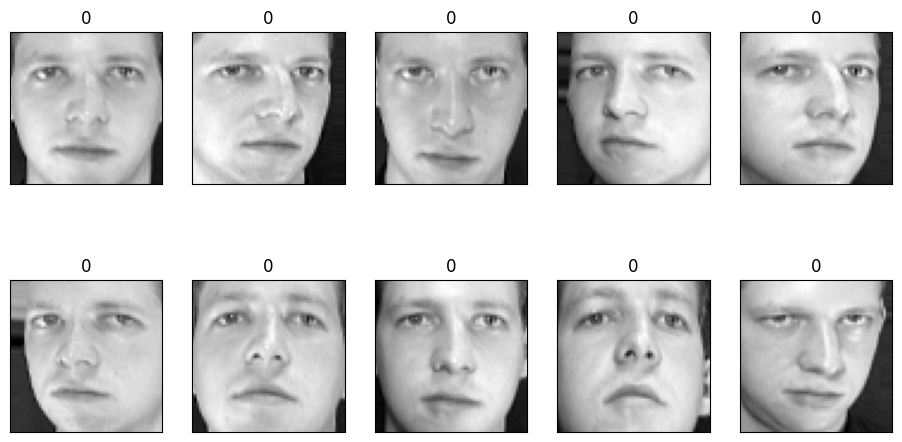

In [146]:
plot(faces.data[:12,:], faces.target, 64, 64, n_row=2, n_col=5)

c) Compute the mean vector $\overline{x}$ (the ”mean face”), and display it. Do you think it is required to scale the data ?

In [147]:
# Compute mean
X = faces.data.copy()
print(X.shape)
X_mean = np.mean(X, axis=0)

(400, 4096)


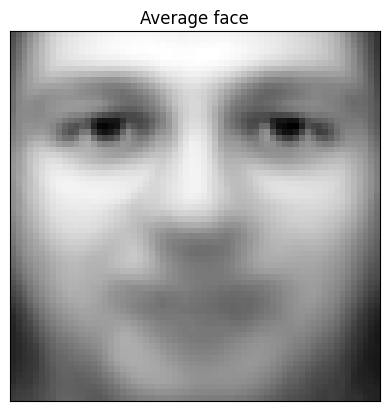

In [148]:
# Plot the average face
plt.imshow(X_mean.reshape((64, 64)), cmap=plt.cm.gray)
plt.title('Average face')
plt.xticks(())
plt.yticks(())
plt.show()

In [149]:
X.min(), X.max()  

(np.float32(0.0), np.float32(1.0))

Since values of X are the pixels that from [0, 1], we don't need to scale this data. Only centering

In [150]:
X_centered = X - X_mean[np.newaxis, :]  # Mean-subtracted Data

(d) Calculate principal components (“eigenfaces”) and display the top 10. (you can use the ”PCA” function from sklearn.decomposition, or any other techniques we have seen).


In [151]:
# Calculate top 10 eigenfaces via SVD approach
U, S, Vt = np.linalg.svd(X_centered)
print(Vt.shape)

(4096, 4096)


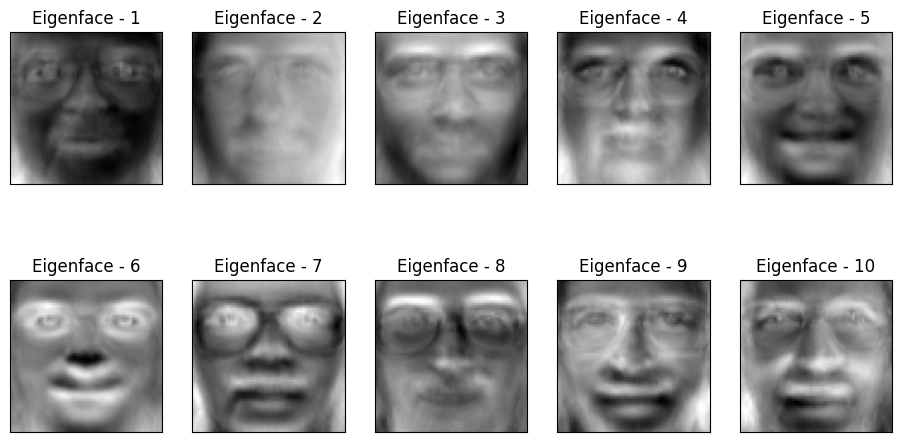

In [152]:
plot(Vt[:10], ['Eigenface - ' + str(k+1) for k in range(10)], 64, 64, n_row=2, n_col=5)

(e) Plot the bar chart of the percentage of the variance explained by each Principal Component, and plot the bar chart of the cumulative explained variance.


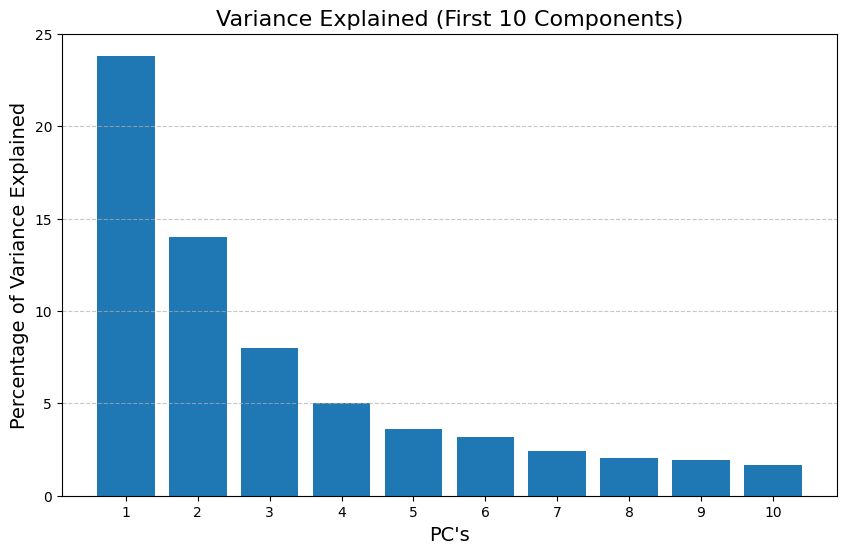

In [153]:
# Explained varience is squared singular matrix
ev = S**2
ev_percentage = ev / np.sum(ev) * 100  

# For the first 10 components
n_components = 10

# Plot the bar chart of the percentage of the variance explained by each Principal Component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), ev_percentage[:n_components])

# Settings
plt.xlabel('PC\'s', fontsize=14)
plt.ylabel('Percentage of Variance Explained', fontsize=14)
plt.title(f'Variance Explained (First {n_components} Components)', fontsize=16)
plt.xticks(range(1, n_components + 1)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

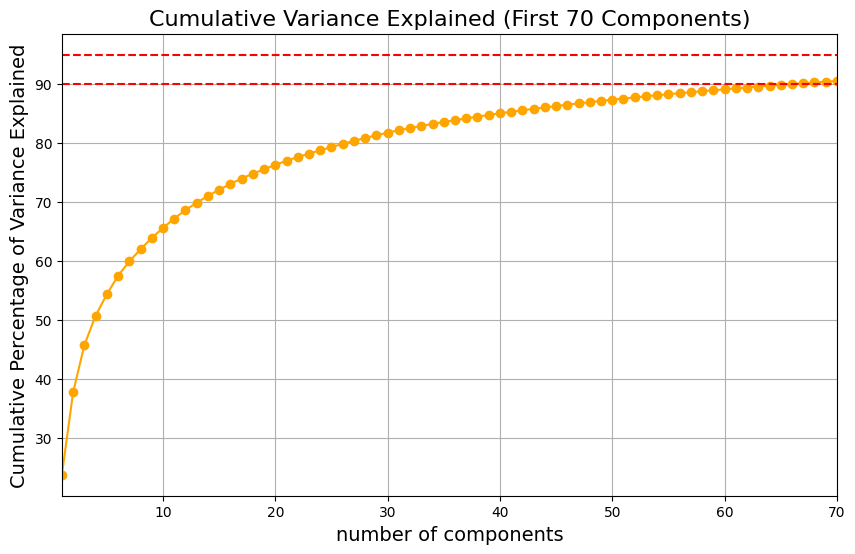

In [154]:
n_components = 70
cumulative_variance_ratio_limited = np.cumsum(ev_percentage[:n_components])

# Plot the bar chart of the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio_limited, marker='o', color='orange')

# Settings
plt.xlabel('number of components', fontsize=14)
plt.ylabel('Cumulative Percentage of Variance Explained', fontsize=14)
plt.title(f'Cumulative Variance Explained (First {n_components} Components)', fontsize=16)
plt.xlim(1, n_components)
plt.grid()
# Satisfied range 90-95%
plt.axhline(y=90, color='r', linestyle='--') 
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

(f) Choose one of the images, and keeping only the top k principal components, reconstruct the starting image, varying k. Discuss the result.


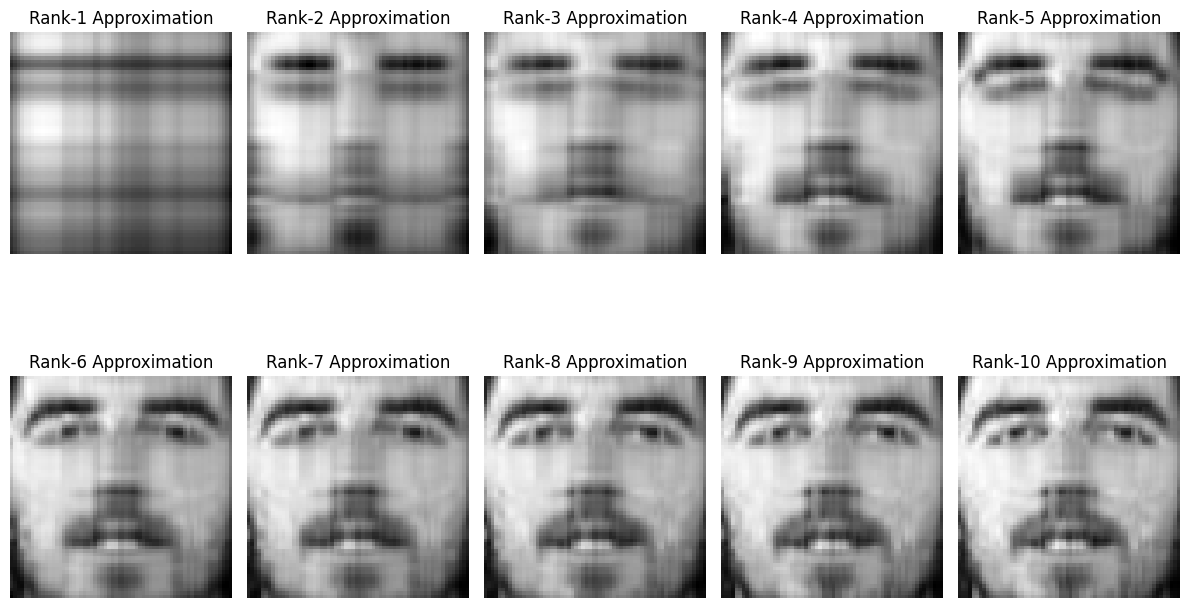

In [155]:
test_image = faces.data[100].reshape(64,64)
U_test, S_test, Vt_test = np.linalg.svd(test_image, full_matrices=True)
k = 10

# Visualize approximations for different values of k
fig, axes = plt.subplots(2, 5, figsize=(12, 8))
axes = axes.ravel()

for i, k in enumerate(range(1, 11)):
    A_k = U_test[:,:k] @ np.diag(S_test)[:k, :k] @ Vt_test[:k,:]
    axes[i].imshow(A_k, cmap=plt.cm.gray)
    axes[i].set_title(f"Rank-{k} Approximation")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

As we see from plots, more appropriate principal components starts from 6 approximation

(g) Principal components for clustering people faces: By projecting an image x onto the first k principal components, we obtain a set of coordinates in this subspace called the Loadings (recall the lecture 4). Some principal components may capture the most common features shared among all human faces, while other principal components will be more useful for distinguishing between individuals. Consider all the pictures of the two first people from the dataset. Consider the sixth and seventh principal components, then project your selected pictures onto this subspace of dimension 2. Discuss the results, can you see a clear clustering between these two people ?

In [156]:
V_k = Vt.T[:, 6:8]
# We take all the pictures of persons 1 and 2
idx = np.concatenate([np.arange(0,11),np.arange(11,22)])
B_sub = X_centered[idx,:]
Lk = B_sub@V_k

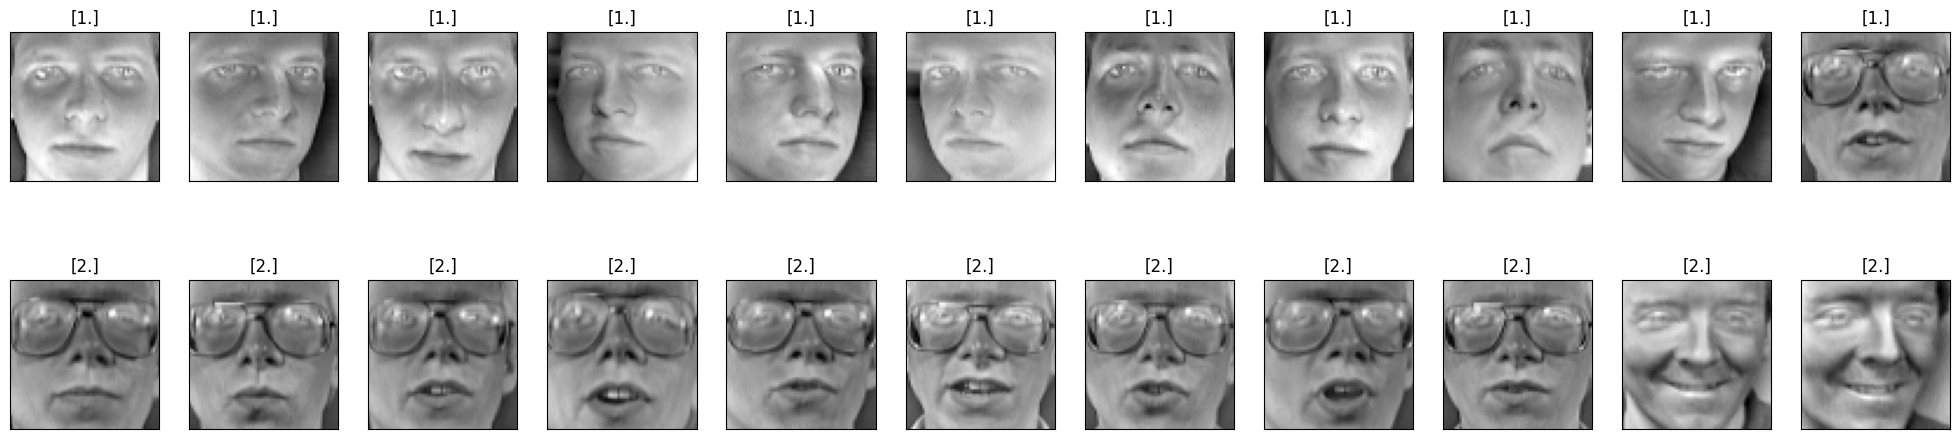

In [157]:
title = np.concatenate([1*np.ones((11,1)),2*np.ones((11,1))])

plot(B_sub, title, 64, 64, n_row=2, n_col=11)

# Q2: SVD and image compression

a) First load the image (in color: RGB = red, green, blue) and convert it into a black & white image, then into an A matrix with numpy, and check visually

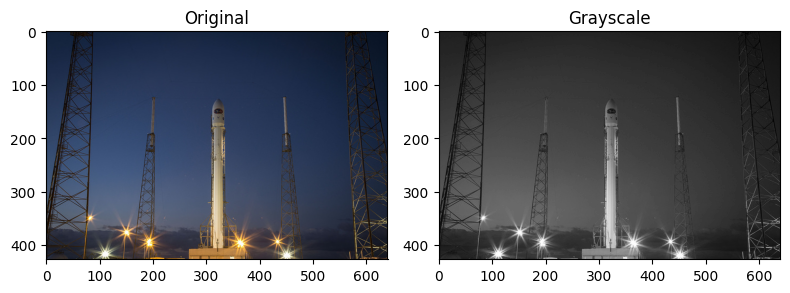

In [158]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
# We select the "rocket" image
caller = getattr(data, 'rocket')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()
# We now convert the image into a matrix for processing with numpy
A = np.matrix(grayscale)

(b) Perform an SVD on this matrix A, to determine the components U, S, V using the svd command in numpy’s linalg library

In [159]:
U, S, Vt = np.linalg.svd(A)
print("U = ", U.shape,
      "\nS = ", S.shape, 
      "\nVt = ", Vt.shape)

U =  (427, 427) 
S =  (427,) 
Vt =  (640, 640)


(c) Calculate an (approximate!) reconstruction of the image using only the first k rank-1 factors. Visually check that the result corresponds (roughly) to the main features of the image (e.g. the rocket, the spotlights, the antennas, · · · ). Write the formula for Ak. (the best rank-k approximation of A with respect to any unitarily invariant norm).

The best rank-k approximation $A_k$​ of $A$ is given by:​

$$ A_k​ = U_k​ S_k ​V_k^T $$

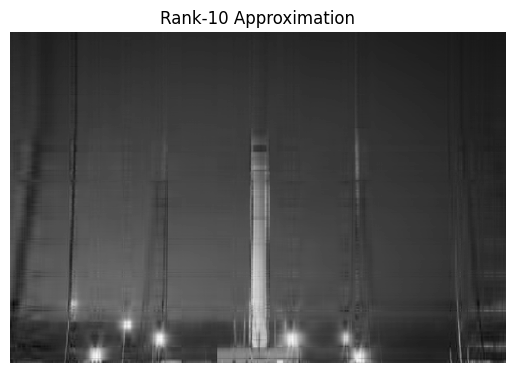

In [160]:
k = 10
A_k = U[:, :k] @ np.diag(S)[:k,:k] @ Vt[:k, :]
plt.imshow(A_k, cmap=plt.cm.gray)
plt.title(f"Rank-{10} Approximation")
plt.axis("off")
plt.show()

(d) Reconstruct with the first k = 2, 3, 4, 5, 10, 20, 30 and 100 rank-1 factors and display the results.

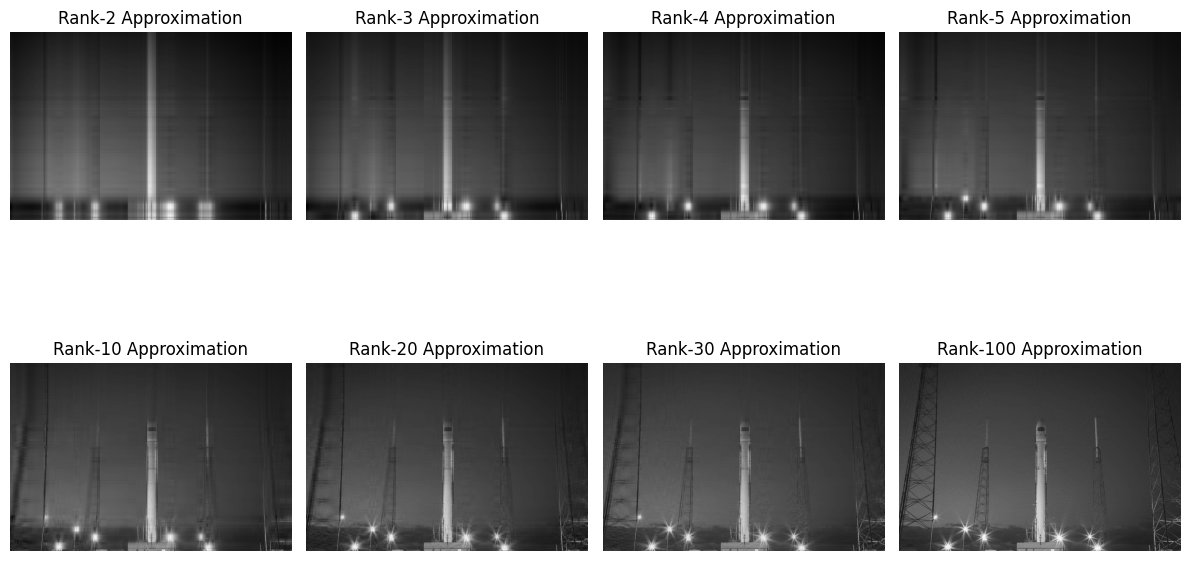

In [161]:
# Visualize approximations for different values of k
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
k_values = [2, 3, 4, 5, 10, 20, 30, 100]
axes = axes.ravel()

for i, k in enumerate(k_values):
    A_k = U[:, :k] @ np.diag(S)[:k,:k] @ Vt[:k, :]
    axes[i].imshow(A_k, cmap=plt.cm.gray)
    axes[i].set_title(f"Rank-{k} Approximation")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Best Rank-k Approximation:

- The $A_k$​ matrix approximates the original image $A$ using only the first k singular values and corresponding singular vectors.
    As k increases, the approximation improves, capturing more details.

Visual Observations:

- For small k, only the major features of the image are retained.
    Increasing k brings finer details.

e) When is a satisfactory reconstruction possible (for which value of k)? Support your claim by showing the cumulative singular values plot for the the different values of k. What kind of information bring the rank-1 factors for k in the interval [20, 30] to the approximation ? Display the result.

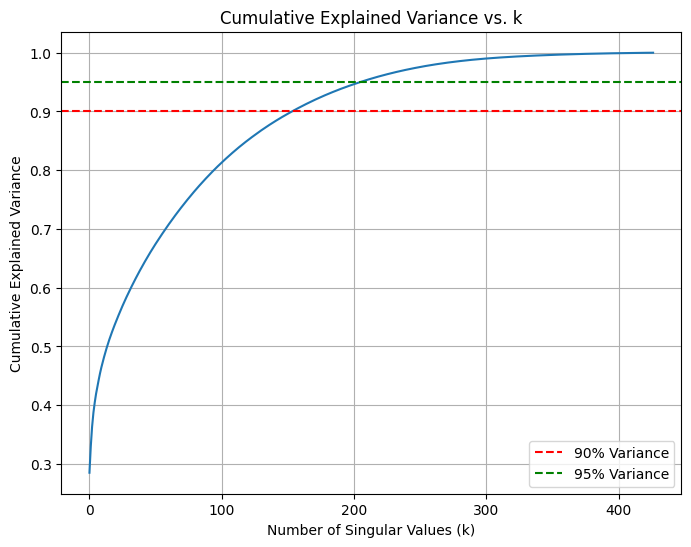

Number of singular values for 90% variance: 155
Number of singular values for 95% variance: 206


In [162]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(S) / np.sum(S)
cumulative_variance.shape

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
sns.lineplot(cumulative_variance)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. k')
plt.legend()
plt.grid()
plt.show()

# Identify the k for 90% and 95% variance
k_90 = np.argmax(cumulative_variance >= 0.9) + 1
k_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of singular values for 90% variance: {k_90}")
print(f"Number of singular values for 95% variance: {k_95}")

When is a satisfactory reconstruction possible?

To determine when a satisfactory reconstruction is possible, we examine the cumulative explained variance using the singular values. The cumulative sum of the singular values divided by the total sum provides the proportion of the total variance explained by the top k singular values:
$$\text{Cumulative Explained Variance} = \frac{\sum_{i=1}^{k}{S_i}}{\sum_{i=1}^n{S_i}}$$


A common threshold is 90-95% of variance explained, which indicates that the reconstruction retains most of the significant information.

This means that the reconstruction becomes "satisfactory" when we use 155 singular values, as it captures the majority of the important information in the image. If we want even more accuracy (capturing 95% of the variance), we would need 206 singular values

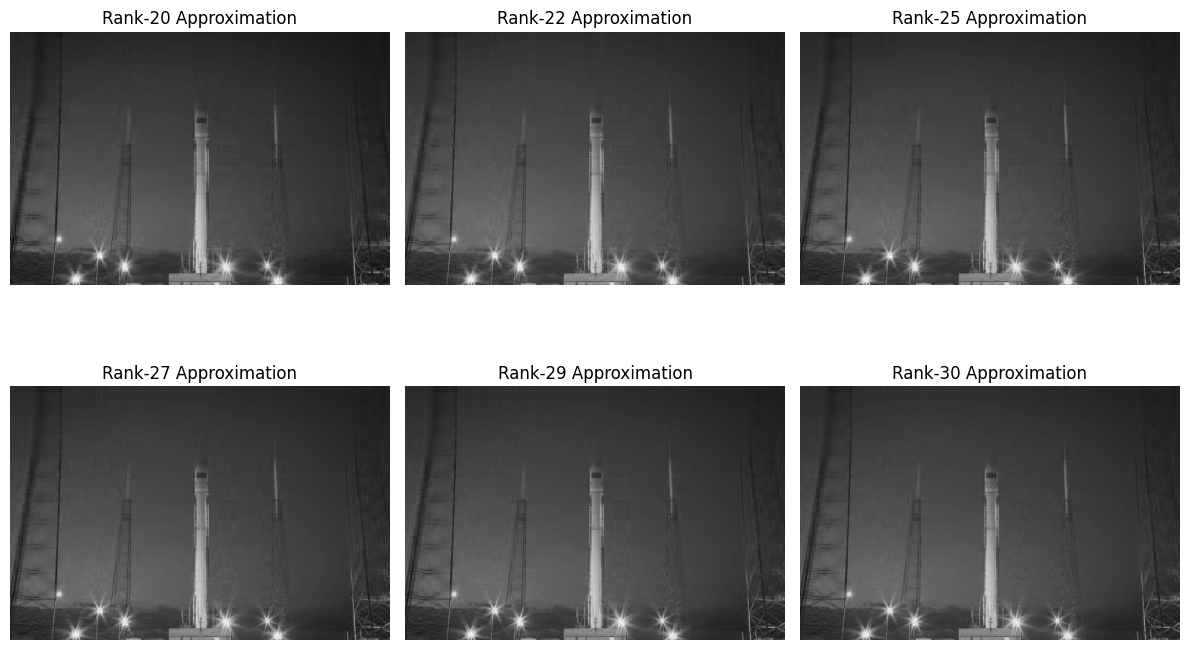

In [163]:
# Visualize rank-k approximations for k in [20, 30]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
k_values = [20, 22, 25, 27, 29, 30]
axes = axes.ravel()

for i, k in enumerate(k_values):
    A_k = U[:, :k] @ np.diag(S)[:k,:k] @ Vt[:k, :]
    axes[i].imshow(A_k, cmap=plt.cm.gray)
    axes[i].set_title(f"Rank-{k} Approximation")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

The additional rank-1 factors for k∈[20,30] refine the image, introducing finer details. However, since the significant variance is already captured by k=155 (90% variance) and k=206 (95% variance), the factors from k=20 to k=30 bring small improvements in accuracy, mostly refining textures and smaller features.

(f) Estimate the corresponding compression ratios.

In [167]:
best_k = 155

In [169]:
def reconstruction_error(A, reconstructed_A):
    return np.linalg.norm(A - reconstructed_A)


original_size = U.size + S.size + Vt.size
compressed_size_k = U[:, :best_k].size + S[:best_k].size + Vt[:best_k, :].size
print(f"Original Size: {original_size}, Compressed Size for k={best_k}: {compressed_size_k}, Size Ration={compressed_size_k/original_size: 0.3}")

reconstructed_A = U[:, :best_k] @ np.diag(S)[:best_k,:best_k] @ Vt[:best_k, :]
print('Error: ', reconstruction_error(A, reconstructed_A))


Original Size: 592356, Compressed Size for k=155: 165540, Size Ration= 0.279
Error:  3.9034335604631614
